In [129]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, UpSampling2D, Reshape, Conv2D
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import IPython.display

### Define the model -

In [130]:
# define model
model = Sequential()
# define input shape, output enough activations for 128 5x5 image
model.add(Dense(128 * 5 * 5, input_dim=100))
# reshape vector of activations into 128 feature maps with 5x5
model.add(Reshape((5, 5, 128)))
# double input from 128 5x5 to 1 10x10 feature map
model.add(UpSampling2D())
# fill in detail in the upsampled feature maps and output a single image
model.add(Conv2D(1, (3,3), padding='same'))
model.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 3200)              323200    
_________________________________________________________________
reshape_45 (Reshape)         (None, 5, 5, 128)         0         
_________________________________________________________________
up_sampling2d_45 (UpSampling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 10, 10, 1)         1153      
Total params: 324,353
Trainable params: 324,353
Non-trainable params: 0
_________________________________________________________________


### Generate a random image using CNN output -
This isn't part of the guide, but I was just curious to see how the generated image would look, so I used a random input value and scaled the image to visualize it.

Input data:
[[0.83652717 0.1988508  0.88748328 0.62298956 0.72752847 0.51967617
  0.904566   0.67791303 0.03796654 0.50797005 0.67065713 0.65622127
  0.47442677 0.80463647 0.26827972 0.75599043 0.92265241 0.36316937
  0.51750865 0.03701922 0.61713418 0.81343909 0.65612283 0.05754485
  0.10312473 0.25903722 0.97689997 0.16122417 0.36782798 0.65893724
  0.82969388 0.50683842 0.26561069 0.11554565 0.39662495 0.75258708
  0.48606579 0.85210463 0.62624472 0.51248718 0.52931061 0.99503841
  0.36990234 0.80188768 0.36129699 0.63809451 0.1572384  0.7554225
  0.24653105 0.83460992 0.16354709 0.39785135 0.76291277 0.02256579
  0.45321546 0.20037259 0.79636457 0.87000925 0.01588747 0.2826866
  0.48675474 0.4310996  0.02101861 0.78283404 0.5769403  0.29218199
  0.08338083 0.18888368 0.7175837  0.25858179 0.41123945 0.17288384
  0.02026009 0.12493396 0.14496813 0.94534323 0.80453098 0.21131731
  0.06519102 0.77603541 0.93155532 0.97323603 0.0430968  0.49701468
  0.88232422 0.56237865 0.13094417 0.1

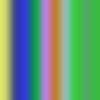

In [186]:
random_data = np.random.rand(1, 100)
print(f"Input data:\n{random_data}")

output = model.predict(random_data)
print(f"Output data:\n{output.reshape(1, 100)}")
reshaped_output = output.reshape(1, 10, 10)

generated_image = Image.fromarray(reshaped_output, mode='RGB')
generated_image = generated_image.resize((100, 100))
print(f"\nGenerated Image: {reshaped_output.shape} => 100x100")
IPython.display.display(generated_image)
